## Libnames

In [226]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from time import time


## Funções

In [243]:
def split_train_test_data (data, name_target, test_size, random_state):
    
    X_all = data.drop([name_target], axis = 1)
    y_all = data[name_target]

    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = test_size ,random_state =random_state)

    print "Training set has {} samples and {} features.".format(X_train.shape[0], X_train.shape[1])
    print "Testing set has {} samples and {} features.".format(X_test.shape[0], X_test.shape[1])
    
    X_train.reset_index(drop=True, inplace = True)
    X_test.reset_index(drop=True, inplace = True)
    y_train.reset_index(drop=True, inplace = True)
    y_test.reset_index(drop=True, inplace = True)
    
    return X_train, X_test, y_train, y_test


def standard_scaler_manual (data) :
    data2 = (data - data.mean())/data.std()
    return data2
def fit_transform_with_function (data, function, sklearn):
    scaler = function
    
    if sklearn == 'True':
        scaler = function
        data_transformed = scaler.fit_transform(data)
        data_transformed2 = pd.DataFrame(data_transformed, columns = data.columns, index = data.index)
        
    else:
        data_transformed2 = data.apply(function)
        
    return scaler, data_transformed2

#X_train.apply(standard_scaler_manual)


def transform_with_function (data, scaler, sklearn):
    
    if sklearn == 'True':
        data_transformed = scaler.transform(data)
        data_transformed2 = pd.DataFrame(data_transformed, columns = data.columns, index = data.index)
    
    else:
        data_transformed2 = data.apply(scaler)
    
        
    
    return data_transformed2

def results_regressor_cv (reg, x_data, y_data, metrics, cv):
    results = []
    for i in metrics:
        m1 = np.mean(cross_val_score(reg, x_data, y_data, scoring = i, cv = cv))
        results.append(m1)
        
    results = pd.DataFrame(results)
    results.index = metrics
    results.columns = ['Regressao Linear']
    return results


def train_test_results (reg, X_train, y_train, X_test, y_test):
    reg.fit(X_train, y_train)
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)

    print "Number of coefficients:", len(reg.coef_)
    print "Estimated intercept coefficient:", reg.intercept_
   
    print '\n'
    
    coefficients = pd.DataFrame(zip(X_train.columns, reg.coef_), columns = ['features', 'coefficients'])
    coefficients.sort_values(by = 'coefficients', ascending = False, inplace=True)
    print coefficients
    
    mse_train = mean_squared_error(y_train, pred_train)
    mse_test = mean_squared_error(y_test, pred_test)
    
    mae_train = mean_absolute_error(y_train, pred_train)
    mae_test = mean_absolute_error(y_test, pred_test)
    
    r2_train = r2_score (y_train, pred_train)
    r2_test = r2_score (y_test, pred_test)
    
    resultados = {
    
    "2. Teste" : [mse_test, mae_test, r2_test],
    "1. Treino" : [mse_train, mae_train, r2_train]
    }
    
    resultados = pd.DataFrame(resultados)
    resultados.index = ['MSE','MAE', 'R2']
    return resultados

def plot_graphs ( X_train, y_train, X_test, y_test):

    plt.scatter(y_train, lm.predict(X_train))
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Train Data - Prices vs Predicted Prices $Y_i$ vs $\hat{Y}_i$")
    plt.show()

    plt.scatter(y_test, lm.predict(X_test))
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Test Data - Prices vs Predicted Prices $Y_i$ vs $\hat{Y}_i$")
    plt.show()
    
def plot_residuals(X_train, y_train, X_test, y_test):
    plt.scatter(lm.predict(X_train), lm.predict(X_train)-y_train, c='b', s=40, alpha = 0.5)
    plt.scatter(lm.predict(X_test), lm.predict(X_test)-y_test, c='g', s=40, alpha = 0.5)
    plt.hlines(y=0, xmin = 0, xmax = 50)
    plt.title('Residual Plot using training (blue) and test (green) data')
    plt.ylabel('Residuals')
    plt.show()
    

### Dados

In [205]:
boston = load_boston()

In [206]:
print boston.keys()
print boston.data.shape
print boston.feature_names
#boston.DESCR

['data', 'feature_names', 'DESCR', 'target']
(506L, 13L)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [207]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [208]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [209]:
data['PRICE'] = boston.target

In [210]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [211]:
X_train, X_test, y_train, y_test = split_train_test_data(data, 'PRICE', test_size = 0.20 ,random_state = 791231)

Training set has 404 samples and 13 features.
Testing set has 102 samples and 13 features.


### data prep - normalização dos dados - usando a biblioteca e usando uma função específica

In [170]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler = MinMaxScaler()


In [171]:
def standard_scaler_manual (data) :
    data2 = (data - data.mean())/data.std()
    return data2


In [172]:
def fit_transform_with_function (data, function, sklearn):
    scaler = function
    
    if sklearn == 'True':
        scaler = function
        data_transformed = scaler.fit_transform(data)
        data_transformed2 = pd.DataFrame(data_transformed, columns = data.columns, index = data.index)
        
    else:
        data_transformed2 = data.apply(function)
        
    return scaler, data_transformed2

#X_train.apply(standard_scaler_manual)

In [173]:
def transform_with_function (data, scaler, sklearn):
    
    if sklearn == 'True':
        data_transformed = scaler.transform(data)
        data_transformed2 = pd.DataFrame(data_transformed, columns = data.columns, index = data.index)
    
    else:
        data_transformed2 = data.apply(scaler)
    
        
    
    return data_transformed2

In [212]:
scaler, X_train_final = fit_transform_with_function(X_train,  StandardScaler(), 'True')
X_train_final.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.399699,-0.484437,-0.172623,-0.288288,-0.085823,-0.517664,0.861626,-0.667972,-0.389419,0.152949,-0.302769,0.405984,0.489518
1,-0.397756,-0.484437,-0.382086,-0.288288,-0.318306,-0.166590,0.757293,-0.635883,-0.505355,-0.133371,1.129208,0.379747,-0.047046
2,-0.406474,-0.484437,-1.033588,-0.288288,-0.404410,0.791261,0.196056,-0.401240,-0.505355,-0.658292,-0.857082,0.363262,-0.795192
3,0.139224,-0.484437,0.996036,-0.288288,0.491078,0.957122,-0.048586,-0.582764,1.697429,1.548762,0.805859,0.170666,-0.139700
4,-0.390968,0.467094,-0.772121,-0.288288,-1.084637,-0.085042,0.368744,2.038800,-0.273483,-0.455482,0.297738,0.187616,-0.348517


In [213]:
X_test_final = transform_with_function(X_test, scaler, 'True')
X_test_final.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.122900,-0.484437,1.209833,-0.288288,2.703967,-1.403642,0.901200,-0.960861,-0.505355,-0.020036,-1.734746,-3.150135,0.479837
1,-0.411133,-0.484437,-0.597327,-0.288288,-0.757440,0.184483,0.357951,0.572744,-0.853162,-0.980403,-0.302769,0.428622,-0.488189
2,0.562595,-0.484437,0.996036,-0.288288,1.343514,-0.485874,0.408319,-0.465846,1.697429,1.548762,0.805859,-4.138424,0.590469
3,-0.403214,0.056205,-0.481761,-0.288288,-0.283864,-0.550837,-1.077522,0.802403,-0.505355,-0.568817,-1.503782,0.354323,0.420373
4,1.293269,-0.484437,0.996036,-0.288288,1.231578,-1.945457,1.117061,-1.030594,1.697429,1.548762,0.805859,0.150234,2.482270


# Modelagem

In [216]:
from sklearn.linear_model import LinearRegression

In [178]:
metrics_tune = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
metrics_calculate = ['r2','mean_squared_error', 'mean_absolute_error' ]
 
lm = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)



## regressao linear com cross validation e posterior aplicação na base inteira de treino

In [217]:
resultados_lm = results_regressor(lm, X_train_final, y_train, metrics, 5)
resultados_lm


,Regressao Linear
r2,0.698242
neg_mean_squared_error,-25.513289
neg_mean_absolute_error,-3.515459


In [224]:
train_test_results(lm, X_train_final, y_train, X_test_final, y_test)

Number of coefficients: 13
Estimated intercept coefficient: 22.6465346535


   features  coefficients
8       RAD      2.695025
5        RM      2.688557
1        ZN      1.076883
11        B      0.748048
3      CHAS      0.678783
6       AGE      0.118900
2     INDUS      0.108669
0      CRIM     -1.031351
9       TAX     -1.905131
4       NOX     -2.135414
10  PTRATIO     -2.279253
7       DIS     -3.101810
12    LSTAT     -3.794914


,1. Treino,2. Teste
MSE,22.271886,20.695189
MAE,3.310888,3.291765
R2,0.741391,0.732702


### Gráficos

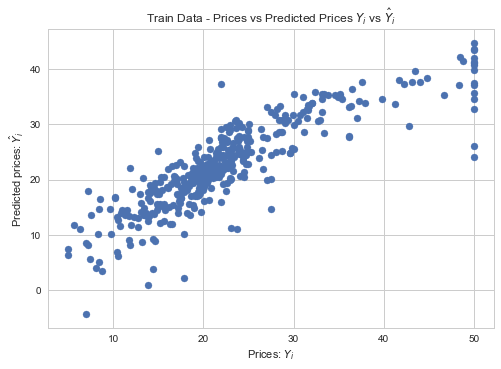

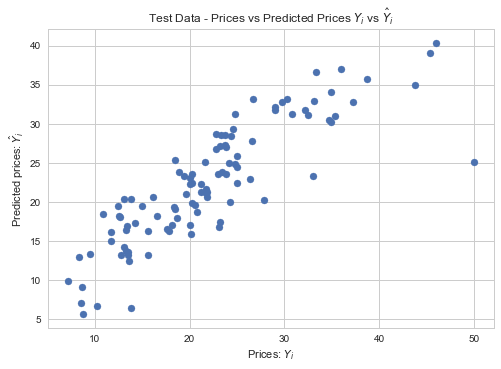

In [237]:
plot_graphs( X_train_final, y_train, X_test_final, y_test)    

### Plot residuals

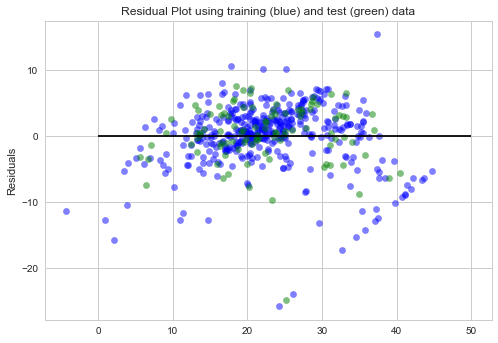

In [242]:
plot_residuals(X_train_final, y_train, X_test_final, y_test)

## Lasso / Ridge - Cross Validation

In [182]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [196]:
ridge = RidgeCV(alphas=[0.001, 0.01, 0.1, 1],scoring='neg_mean_squared_error')

In [198]:
ridge_model = ridge.fit(X_train_final, y_train)
def train_ridge_linear_model(_train_x, train_y, _predict_x,
                             sample_weight=None):
    print_title("Ridge Regressor")
    train_x, predict_x = \
        standarize_feature(_train_x, _predict_x)

    # using the default CV
    alphas = [0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]
    reg = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)
    #reg.fit(train_x, train_y, sample_weight=sample_weight)
    reg.fit(train_x, train_y)
    cv_mse = np.mean(reg.cv_values_, axis=0)
    print("alphas: %s" % alphas)
    print("CV MSE: %s" % cv_mse)
    print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)

    # generate the prediction using the best model
    alpha = reg.alpha_
    reg = linear_model.Ridge(alpha=alpha)
    #reg.fit(train_x, train_y, sample_weight=sample_weight)
    reg.fit(train_x, train_y)
    predict_y = reg.predict(predict_x)
    train_y_pred = reg.predict(train_x)

    return {"y": predict_y, "train_y": train_y_pred, "coef": reg.coef_} 

In [202]:
ridge_model.alpha_

1.0

In [194]:
def grid_search_model (x, y, clf, parameters, scorer, random_cv):
    grid_obj = GridSearchCV(clf, parameters, scoring = scorer, cv = 5)
    start = time()
    grid_fit = grid_obj.fit(x, y)
    end = time()
    print "Best score:" , grid_fit.best_score_
    print "Best parameters:" , grid_fit.best_params_
    print "Find best parameterers in {:.4f} seconds.".format(end - start) 
    return grid_fit.best_estimator_


In [195]:
reg_ridge = grid_search_model (X_train_final, y_train,ridge ,params_ridge, 'neg_mean_squared_error', 22)

TypeError: len() of unsized object

In [123]:

>> y_true = [[0.5, 1],[-1, 1],[7, -6]]
>>> y_pred = [[0, 2],[-1, 2],[8, -5]]
>>> mean_squared_error(y_true, y_pred)  
0.708...
>>> mean_squared_error(y_true, y_pred, multioutput='raw_values')
... 
array([ 0.416...,  1.        ])
>>> mean_squared_error(y_true, y_pred, multioutput=[0.3, 0.7])
... 

0.69824195501465824